## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import tensorflow.keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tensorflow.keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tensorflow.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tensorflow.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.7, 0.5, 0.3, 0.1]

In [23]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    tensorflow.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tensorflow.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}


Experiment with LR = 0.900000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

50000/50000 [==============================] - 7s 146us/sample - loss: 0.4538 - accuracy: 0.8409 - val_loss: 1.8782 - val_accuracy: 0.5297
Epoch 49/50
50000/50000 [==============================] - 7s 144us/sample - loss: 0.4430 - accuracy: 0.8436 - val_loss: 2.0234 - val_accuracy: 0.5123
Epoch 50/50
50000/50000 [==============================] - 7s 145us/sample - loss: 0.4288 - accuracy: 0.8498 - val_loss: 1.8809 - val_accuracy: 0.5325
Experiment with LR = 0.700000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 7s 147us/sample - loss: 0.9267 - accuracy: 0.6749 - val_loss: 1.4255 - val_accuracy: 0.5199
Epoch 46/50
50000/50000 [==============================] - 7s 148us/sample - loss: 0.9014 - accuracy: 0.6851 - val_loss: 1.5335 - val_accuracy: 0.5007
Epoch 47/50
50000/50000 [==============================] - 7s 149us/sample - loss: 0.8944 - accuracy: 0.6873 - val_loss: 1.4183 - val_accuracy: 0.5221
Epoch 48/50
50000/50000 [==============================] - 7s 148us/sample - loss: 0.8827 - accuracy: 0.6902 - val_loss: 1.4584 - val_accuracy: 0.5092
Epoch 49/50
50000/50000 [==============================] - 7s 144us/sample - loss: 0.8704 - accuracy: 0.6939 - val_loss: 1.5138 - val_accuracy: 0.5042
Epoch 50/50
50000/50000 [==============================] - 7s 148us/sample - loss: 0.8504 - accuracy: 0.7039 - val_loss: 1.4321 - val_accuracy: 0.5236
Experiment with LR = 0.500000
Model: "model"
_____________________________________________________________

50000/50000 [==============================] - 7s 141us/sample - loss: 1.1040 - accuracy: 0.6132 - val_loss: 1.4788 - val_accuracy: 0.4891
Epoch 43/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.0974 - accuracy: 0.6158 - val_loss: 1.4453 - val_accuracy: 0.4911
Epoch 44/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.0864 - accuracy: 0.6196 - val_loss: 1.4058 - val_accuracy: 0.5150
Epoch 45/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.0803 - accuracy: 0.6214 - val_loss: 1.4037 - val_accuracy: 0.5125
Epoch 46/50
50000/50000 [==============================] - 7s 144us/sample - loss: 1.0679 - accuracy: 0.6254 - val_loss: 1.4663 - val_accuracy: 0.4864
Epoch 47/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.0598 - accuracy: 0.6280 - val_loss: 1.6301 - val_accuracy: 0.4567
Epoch 48/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.0494 - accuracy: 0.63

50000/50000 [==============================] - 8s 150us/sample - loss: 1.2268 - accuracy: 0.5688 - val_loss: 1.6128 - val_accuracy: 0.4347
Epoch 40/50
50000/50000 [==============================] - 7s 148us/sample - loss: 1.2212 - accuracy: 0.5737 - val_loss: 1.4523 - val_accuracy: 0.4880
Epoch 41/50
50000/50000 [==============================] - 7s 149us/sample - loss: 1.2153 - accuracy: 0.5736 - val_loss: 1.4370 - val_accuracy: 0.4982
Epoch 42/50
50000/50000 [==============================] - 7s 149us/sample - loss: 1.2054 - accuracy: 0.5785 - val_loss: 1.3884 - val_accuracy: 0.5107
Epoch 43/50
50000/50000 [==============================] - 8s 150us/sample - loss: 1.2002 - accuracy: 0.5788 - val_loss: 1.5285 - val_accuracy: 0.4746
Epoch 44/50
50000/50000 [==============================] - 8s 151us/sample - loss: 1.1894 - accuracy: 0.5843 - val_loss: 1.3665 - val_accuracy: 0.5180
Epoch 45/50
50000/50000 [==============================] - 7s 147us/sample - loss: 1.1815 - accuracy: 0.58

50000/50000 [==============================] - 7s 148us/sample - loss: 1.3130 - accuracy: 0.5408 - val_loss: 1.5663 - val_accuracy: 0.4393
Epoch 37/50
50000/50000 [==============================] - 7s 142us/sample - loss: 1.3005 - accuracy: 0.5447 - val_loss: 1.4678 - val_accuracy: 0.4734
Epoch 38/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.2939 - accuracy: 0.5460 - val_loss: 1.4360 - val_accuracy: 0.4804
Epoch 39/50
50000/50000 [==============================] - 7s 145us/sample - loss: 1.2831 - accuracy: 0.5501 - val_loss: 1.4136 - val_accuracy: 0.4990
Epoch 40/50
50000/50000 [==============================] - 7s 141us/sample - loss: 1.2735 - accuracy: 0.5529 - val_loss: 1.3815 - val_accuracy: 0.5057
Epoch 41/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.2729 - accuracy: 0.5528 - val_loss: 1.4142 - val_accuracy: 0.4950
Epoch 42/50
50000/50000 [==============================] - 7s 144us/sample - loss: 1.2630 - accuracy: 0.55

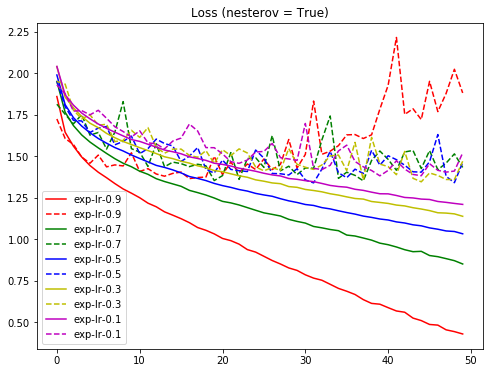

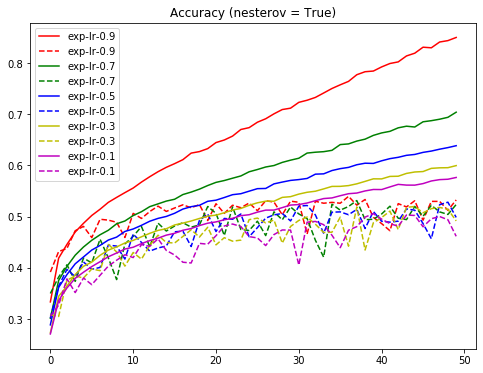

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss (nesterov = True)')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (nesterov = True)")
plt.legend()
plt.show()

In [26]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    tensorflow.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tensorflow.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}


Experiment with LR = 0.900000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

50000/50000 [==============================] - 4s 85us/sample - loss: 0.5930 - accuracy: 0.7858 - val_loss: 1.6627 - val_accuracy: 0.5180
Epoch 49/50
50000/50000 [==============================] - 4s 88us/sample - loss: 0.5934 - accuracy: 0.7871 - val_loss: 1.6586 - val_accuracy: 0.5319
Epoch 50/50
50000/50000 [==============================] - 4s 87us/sample - loss: 0.5755 - accuracy: 0.7952 - val_loss: 1.6411 - val_accuracy: 0.5375
Experiment with LR = 0.700000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 5s 98us/sample - loss: 0.8827 - accuracy: 0.6890 - val_loss: 1.4040 - val_accuracy: 0.5334
Epoch 46/50
50000/50000 [==============================] - 5s 99us/sample - loss: 0.8674 - accuracy: 0.6972 - val_loss: 1.3920 - val_accuracy: 0.5236
Epoch 47/50
50000/50000 [==============================] - 5s 95us/sample - loss: 0.8531 - accuracy: 0.7006 - val_loss: 1.5270 - val_accuracy: 0.5037
Epoch 48/50
50000/50000 [==============================] - 5s 93us/sample - loss: 0.8428 - accuracy: 0.7068 - val_loss: 1.5022 - val_accuracy: 0.5033
Epoch 49/50
50000/50000 [==============================] - 5s 93us/sample - loss: 0.8329 - accuracy: 0.7074 - val_loss: 1.4708 - val_accuracy: 0.5112
Epoch 50/50
50000/50000 [==============================] - 5s 91us/sample - loss: 0.8286 - accuracy: 0.7090 - val_loss: 1.4414 - val_accuracy: 0.5289
Experiment with LR = 0.500000
Model: "model"
_________________________________________________________________
L

50000/50000 [==============================] - 4s 89us/sample - loss: 1.0799 - accuracy: 0.6205 - val_loss: 1.4298 - val_accuracy: 0.5054
Epoch 43/50
50000/50000 [==============================] - 4s 88us/sample - loss: 1.0767 - accuracy: 0.6209 - val_loss: 1.4512 - val_accuracy: 0.4941
Epoch 44/50
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0679 - accuracy: 0.6244 - val_loss: 1.4109 - val_accuracy: 0.5040
Epoch 45/50
50000/50000 [==============================] - 4s 89us/sample - loss: 1.0554 - accuracy: 0.6284 - val_loss: 1.3883 - val_accuracy: 0.5141
Epoch 46/50
50000/50000 [==============================] - 4s 86us/sample - loss: 1.0469 - accuracy: 0.6316 - val_loss: 1.4553 - val_accuracy: 0.5027
Epoch 47/50
50000/50000 [==============================] - 5s 91us/sample - loss: 1.0418 - accuracy: 0.6331 - val_loss: 1.3992 - val_accuracy: 0.5200
Epoch 48/50
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0279 - accuracy: 0.6404 - va

50000/50000 [==============================] - 5s 107us/sample - loss: 1.2125 - accuracy: 0.5747 - val_loss: 1.4668 - val_accuracy: 0.4858
Epoch 40/50
50000/50000 [==============================] - 5s 99us/sample - loss: 1.2001 - accuracy: 0.5795 - val_loss: 1.3852 - val_accuracy: 0.5102
Epoch 41/50
50000/50000 [==============================] - 5s 99us/sample - loss: 1.2006 - accuracy: 0.5788 - val_loss: 1.3944 - val_accuracy: 0.5019
Epoch 42/50
50000/50000 [==============================] - 5s 98us/sample - loss: 1.1830 - accuracy: 0.5864 - val_loss: 1.5157 - val_accuracy: 0.4741
Epoch 43/50
50000/50000 [==============================] - 5s 101us/sample - loss: 1.1805 - accuracy: 0.5867 - val_loss: 1.3520 - val_accuracy: 0.5203
Epoch 44/50
50000/50000 [==============================] - 5s 98us/sample - loss: 1.1667 - accuracy: 0.5917 - val_loss: 1.4123 - val_accuracy: 0.4924
Epoch 45/50
50000/50000 [==============================] - 5s 97us/sample - loss: 1.1629 - accuracy: 0.5893 - 

50000/50000 [==============================] - 4s 90us/sample - loss: 1.2970 - accuracy: 0.5425 - val_loss: 1.5331 - val_accuracy: 0.4608
Epoch 37/50
50000/50000 [==============================] - 4s 89us/sample - loss: 1.2915 - accuracy: 0.5461 - val_loss: 1.4606 - val_accuracy: 0.4849
Epoch 38/50
50000/50000 [==============================] - 5s 90us/sample - loss: 1.2783 - accuracy: 0.5504 - val_loss: 1.4386 - val_accuracy: 0.4862
Epoch 39/50
50000/50000 [==============================] - 16s 322us/sample - loss: 1.2692 - accuracy: 0.5543 - val_loss: 1.4231 - val_accuracy: 0.4922
Epoch 40/50
50000/50000 [==============================] - 29s 578us/sample - loss: 1.2673 - accuracy: 0.5560 - val_loss: 1.4881 - val_accuracy: 0.4698
Epoch 41/50
50000/50000 [==============================] - 29s 574us/sample - loss: 1.2572 - accuracy: 0.5584 - val_loss: 1.4070 - val_accuracy: 0.5012
Epoch 42/50
50000/50000 [==============================] - 29s 573us/sample - loss: 1.2539 - accuracy: 0.5

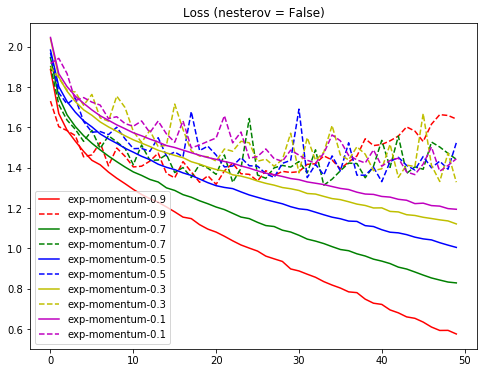

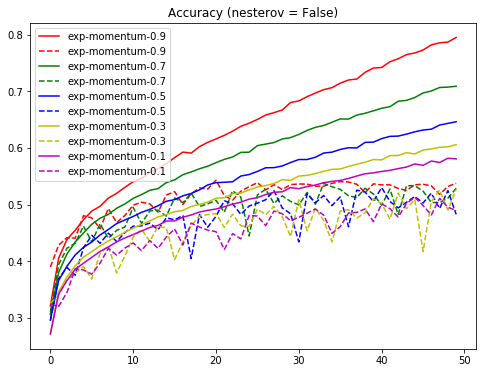

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss (nesterov = False)')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (nesterov = False)")
plt.legend()
plt.show()